In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [45]:
df=pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df.sample(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
9689,9689,NaN,No,6.0,6.0,No,9.0,3.0,Extrovert
11615,11615,4.0,No,8.0,6.0,No,10.0,7.0,Introvert
13241,13241,8.0,Yes,3.0,NaN,Yes,1.0,2.0,Introvert
15639,15639,2.0,No,10.0,4.0,No,10.0,10.0,Extrovert
2110,2110,3.0,No,6.0,7.0,No,14.0,9.0,Extrovert


In [13]:
df.shape

(18524, 9)

In [43]:
test_df.shape

(6175, 8)

## Encoding the Personality column

In [17]:
le = LabelEncoder()
df['Personality_encoded']= le.fit_transform(df['Personality'])

df.head(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_encoded
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,1
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert,0


In [18]:
# Using .map() for 'Stage_fear'and 'Drained_after_socializing'

df['Stage_fear']=df['Stage_fear'].map({'Yes':1,'No':0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes':1,'No':0})

df.sample(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_encoded
1258,1258,5.0,1.0,2.0,NaN,1.0,2.0,2.0,Introvert,1
12013,12013,1.0,1.0,2.0,NaN,1.0,3.0,1.0,Introvert,1
9526,9526,1.0,0.0,4.0,6.0,0.0,14.0,3.0,Extrovert,0
755,755,3.0,0.0,7.0,5.0,0.0,15.0,NaN,Extrovert,0
11900,11900,3.0,0.0,7.0,6.0,0.0,8.0,4.0,Extrovert,0


## Imputing the missing values

In [19]:
df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
Personality_encoded             0
dtype: int64

In [20]:
cols = [
    'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
    'Going_outside', 'Drained_after_socializing',
    'Friends_circle_size', 'Post_frequency'
]

si = SimpleImputer(strategy = 'median')
df[cols]=si.fit_transform(df[cols])

df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
Personality_encoded          0
dtype: int64

### Splitting train and test data

In [21]:
features =[
    'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
    'Going_outside', 'Drained_after_socializing',
    'Friends_circle_size', 'Post_frequency'
]
X= df[features]
y= df['Personality_encoded']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)

Shape of X_train:  (14819, 7)
Shape of X_test:  (3705, 7)


### Plotting the values for understanding the data more clearly

<Axes: xlabel='Personality'>

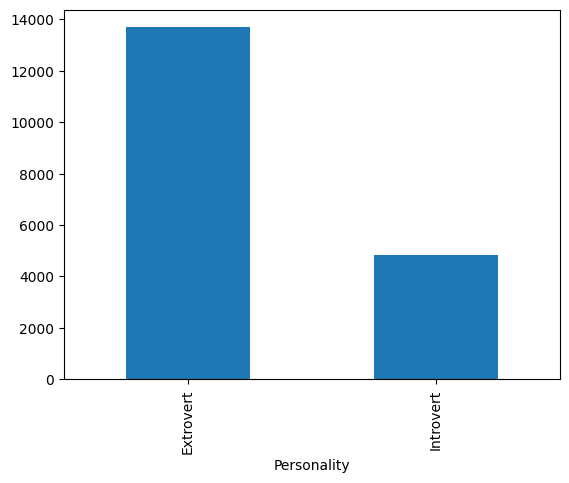

In [22]:
df['Personality'].value_counts().plot(kind='bar')


array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Stage_fear'}>,
        <Axes: title={'center': 'Social_event_attendance'}>],
       [<Axes: title={'center': 'Going_outside'}>,
        <Axes: title={'center': 'Drained_after_socializing'}>,
        <Axes: title={'center': 'Friends_circle_size'}>],
       [<Axes: title={'center': 'Post_frequency'}>, <Axes: >, <Axes: >]],
      dtype=object)

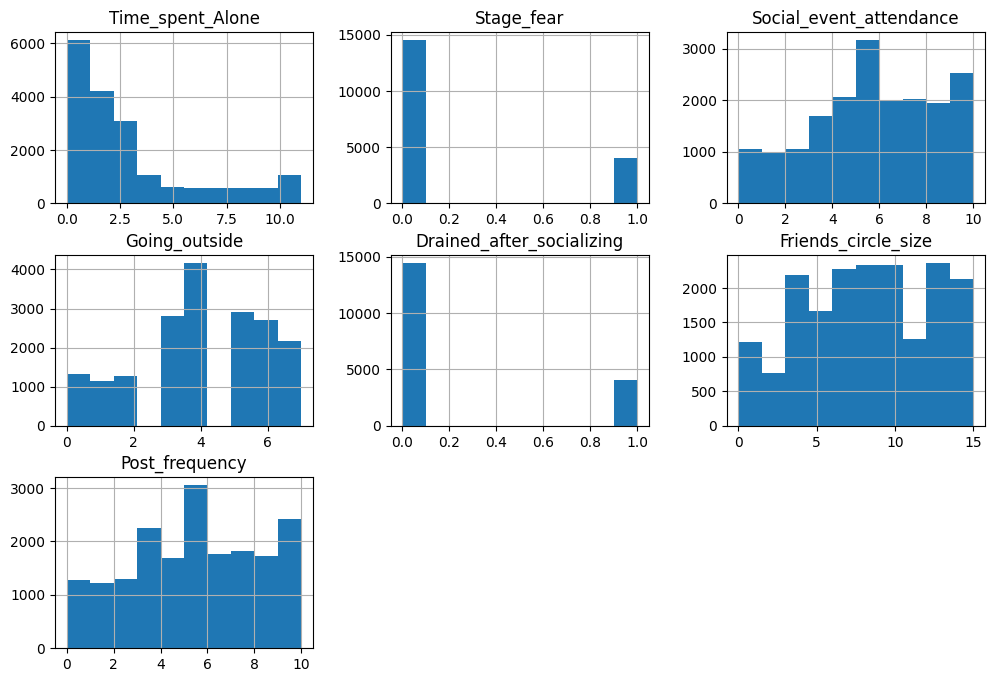

In [24]:
df[features].hist(figsize=(12,8))
# x-> column value, y->count

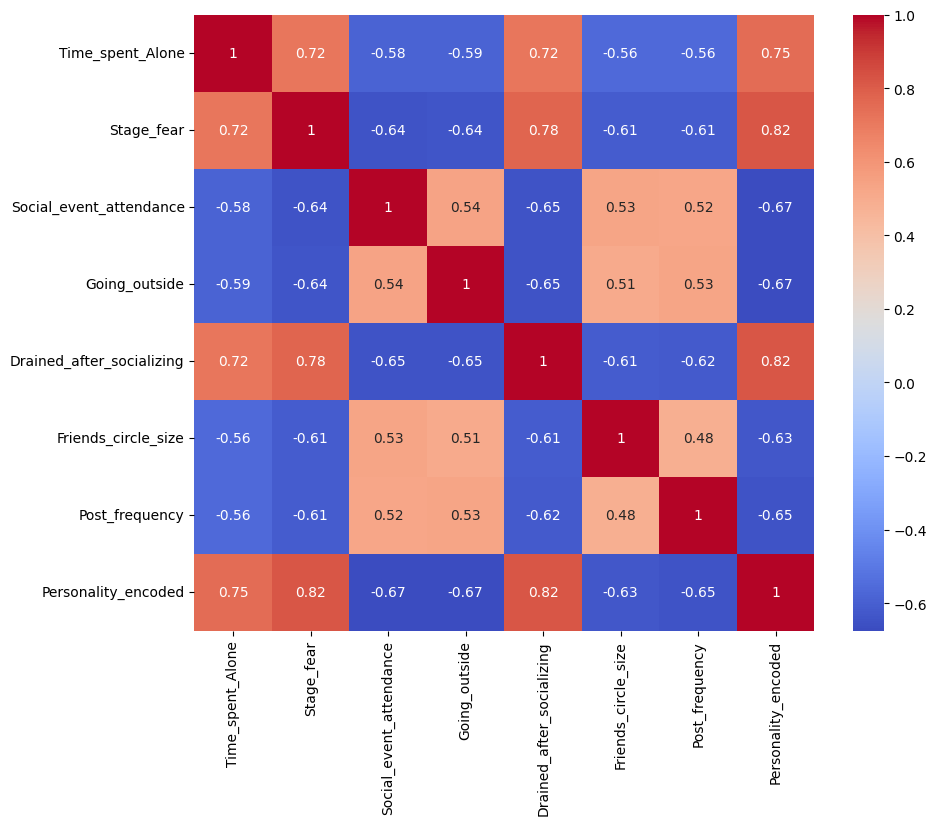

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df[features+['Personality_encoded']].corr(),annot=True,cmap='coolwarm')
plt.show()

### Checking if there is any outliers

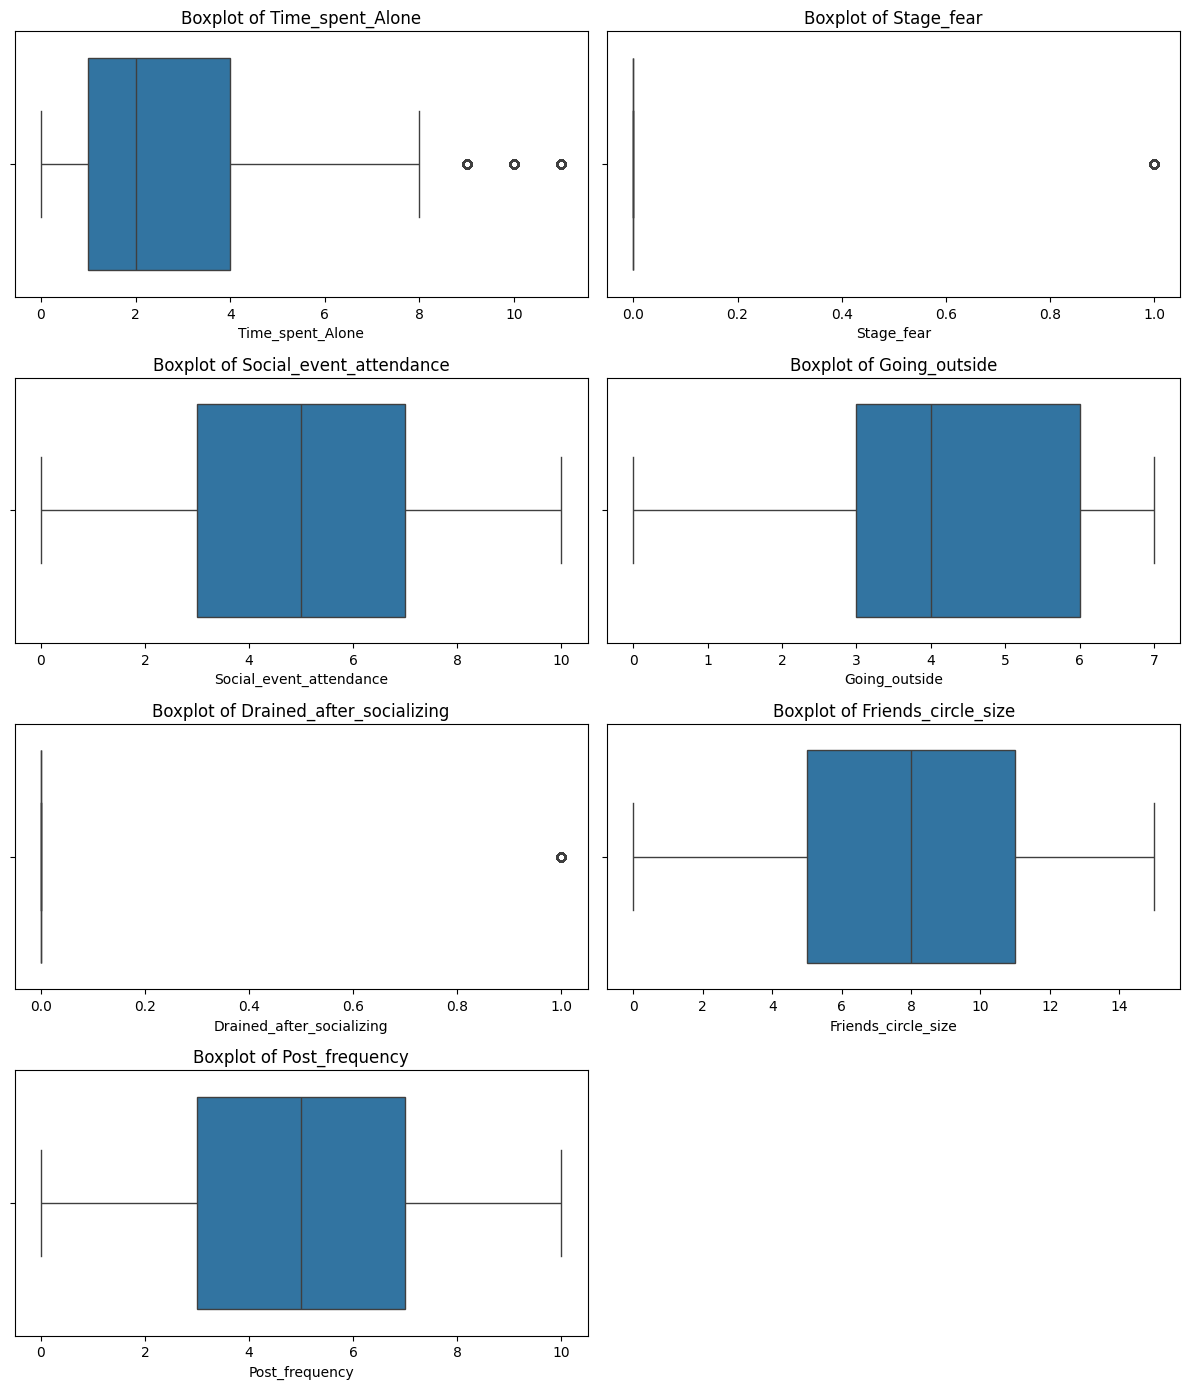

In [35]:
plt.figure(figsize=(12, len(features) * 2))

for i, col in enumerate(features):
    plt.subplot((len(features) + 1) // 2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Applying Models

### Logistic Regression

In [47]:
lgr = LogisticRegression(max_iter=1000)

lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)

# test_pred = lgr.predict(test_df[features])
# test_pred_labels = le.inverse_transform(test_pred)

accuracy = accuracy_score(y_test,y_pred)*100
print(f"Accuracy of logistic regression :{accuracy:.4f}")

Accuracy of logistic regression :97.1660


### RandomForest Classifier

In [41]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"Accuracy of Random Forest: {accuracy_rf:.4f}")

Accuracy of Random Forest: 96.6802


In [49]:
test_df = pd.read_csv('test.csv')

test_df['Stage_fear'] = test_df['Stage_fear'].map({'Yes':1,'No':0})
test_df['Drained_after_socializing'] = test_df['Drained_after_socializing'].map({'Yes':1,'No':0})

test_df[cols] = si.transform(test_df[cols])

test_pred = lgr.predict(test_df[features])

test_pred_labels = le.inverse_transform(test_pred)

submission = pd.DataFrame({
    'id': test_df['id'],
    'Personality': test_pred_labels
})

submission.to_csv('submission.csv', index=False)